In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict

# custom libs
import sys
sys.path.append("..")
from src.libs.dynamicFPC import K_dFPC, W_dFPC
from src.libs.plotting import set_plotting_configs
from src.libs.transformations import obtain_densities, obtain_lqds, obtain_densities_from_lqd

In [3]:
# Dados
data_path = "../data/processed/"
returns_path = ''.join([data_path, 'ibovespa_treated.xlsx'])
df = pd.read_excel(returns_path, index_col="time")
df.head()

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-11-14,2025-11-17,2025-11-18,2025-11-19,2025-11-21,2025-11-24,2025-11-25,2025-11-26,2025-11-27,2025-11-28
time,,,,,,,,,,,,,,,,,,,,,
10:00:00,0.000011,-0.000372,-0.000035,0.007233,-0.001305,-0.000459,0.002388,0.002212,-0.008001,-0.000824,...,-0.000957,-0.002307,-0.003734,-0.005020,-0.001139,-0.000255,0.002339,0.004176,-0.000224,-0.000238
10:05:00,-0.002271,0.003372,0.001716,0.005538,0.000069,0.006429,0.002343,0.001918,-0.007582,-0.000413,...,-0.001522,0.000739,-0.000613,0.000306,-0.002021,-0.000810,0.001557,-0.001565,-0.000193,0.002906
10:10:00,-0.000582,0.002832,-0.000502,0.000739,0.000261,0.001891,0.000775,-0.001172,0.000216,-0.000432,...,0.000360,-0.000105,-0.000159,-0.000362,0.000092,0.001131,0.001170,0.000202,0.000556,0.000475
10:15:00,-0.001997,0.001091,0.000111,-0.000192,0.000407,-0.001392,-0.000477,-0.001526,0.000198,-0.001821,...,0.001121,-0.000284,0.003272,-0.001107,-0.001012,-0.000174,0.001002,0.001815,-0.000168,0.000973
10:20:00,-0.000037,-0.000505,-0.000327,-0.000580,-0.000436,-0.000405,0.001263,0.000676,-0.002667,0.001033,...,0.000449,0.000335,0.000853,0.000981,-0.000057,-0.000096,0.000832,0.001951,0.001060,-0.001004


In [4]:
#
M=3000
df_densities_supports, df_densities = obtain_densities(df, M=M)
df_densities.head()

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-11-14,2025-11-17,2025-11-18,2025-11-19,2025-11-21,2025-11-24,2025-11-25,2025-11-26,2025-11-27,2025-11-28
0,26.484908,26.956133,43.192058,125.280911,22.281346,38.967352,16.381520,14.790396,14.755901,68.336475,...,56.055614,22.715586,14.822458,15.843866,32.781883,18.742967,33.634914,25.011205,59.591366,35.178493
1,26.549913,26.973634,43.381074,126.228831,22.328213,39.236235,16.389919,14.873119,14.785411,68.447117,...,56.269242,22.760257,14.822055,15.843451,32.878703,18.745446,33.688952,25.117131,59.739446,35.313673
2,26.614794,26.990503,43.570813,127.181415,22.375076,39.506838,16.398066,14.956030,14.814484,68.557193,...,56.483268,22.804829,14.820845,15.842209,32.975476,18.747281,33.742663,25.223321,59.886899,35.448818
3,26.679553,27.006743,43.761277,128.138661,22.421938,39.779179,16.405963,15.039127,14.843118,68.666702,...,56.697690,22.849304,14.818828,15.840138,33.072200,18.748473,33.796047,25.329778,60.033721,35.583923
4,26.744189,27.022353,43.952468,129.100567,22.468800,40.053275,16.413611,15.122411,14.871311,68.775642,...,56.912509,22.893683,14.816005,15.837239,33.168874,18.749022,33.849104,25.436506,60.179908,35.718987


In [5]:
lqdSup, df_lqds, c = obtain_lqds(df_densities_supports, df_densities) 

df_lqds.head()

Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-11-14,2025-11-17,2025-11-18,2025-11-19,2025-11-21,2025-11-24,2025-11-25,2025-11-26,2025-11-27,2025-11-28
0,-3.291162,-3.312394,-3.786379,-4.874534,-3.116237,-3.680875,-2.813958,-2.710720,-2.706796,-4.261699,...,-4.051187,-3.142843,-2.707978,-2.782172,-3.514932,-2.942690,-3.542755,-3.232546,-4.102072,-3.575104
1,-3.310255,-3.316082,-3.814810,-4.881368,-3.140384,-3.702151,-2.819715,-2.731040,-2.718934,-4.269305,...,-4.067698,-3.164606,-2.705502,-2.779735,-3.534229,-2.942163,-3.552304,-3.261041,-4.119707,-3.597743
2,-3.328377,-3.318838,-3.842364,-4.888140,-3.163541,-3.722958,-2.822779,-2.750731,-2.729608,-4.276613,...,-4.083808,-3.184983,-2.698051,-2.772392,-3.552744,-2.937229,-3.561328,-3.288471,-4.136204,-3.619353
3,-3.345617,-3.320690,-3.869089,-4.894851,-3.185944,-3.743319,-2.823575,-2.769824,-2.738876,-4.283633,...,-4.099535,-3.204145,-2.685456,-2.759995,-3.570518,-2.927901,-3.569855,-3.314953,-4.151642,-3.640009
4,-3.362051,-3.321665,-3.895031,-4.901503,-3.207803,-3.763260,-2.822574,-2.788360,-2.746783,-4.290372,...,-4.114894,-3.222246,-2.667462,-2.742286,-3.587599,-2.914162,-3.577909,-3.340589,-4.166091,-3.659781


# Time series modeling

In [167]:
from statsmodels.tsa.stattools import adfuller, kpss#, phillips_perron
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import pmdarima as pm

In [69]:
def adf_test(x):
    res = adfuller(x, autolag='AIC')
    # print('ADF Statistic: %f' % res[0])
    # print('p-value: %f' % res[1])
    # print('Critical Values:')
    # for k,v in res[4].items():
    #     print(f'   {k}: {v}')
    if not res[1] < 0.05:
        print('\t ADF => reject H0 (unit root) ? ', res[1] < 0.05)
        plt.figure()
        plt.plot(x)
        plt.show()
    print()

def kpss_test(x, regression='c'):
    statistic, p_value, lags, crit = kpss(x, regression=regression)
    # print('KPSS Statistic: %f' % statistic)
    # print('p-value: %f' % p_value)
    # print('Critical Values:')
    # for k,v in crit.items():
    #     print(f'   {k}: {v}')
    if p_value < 0.05:
        print('\t KPSS => reject H0 (stationary) ? ', p_value < 0.05)
        plt.figure()
        plt.plot(x)
        plt.show()
    print()

In [70]:
train_index = int(df_lqds.shape[1]*0.8)

train, test = df_lqds.iloc[:, :train_index], df_lqds.iloc[:, train_index:]

In [71]:
print(train.shape)
print(test.shape)

(3000, 199)
(3000, 50)


In [154]:
train.tail()

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-09-05,2025-09-08,2025-09-09,2025-09-10,2025-09-11,2025-09-12,2025-09-15,2025-09-16,2025-09-17,2025-09-18
2995,-2.657617,-2.932943,-3.746215,-2.344720,-2.986797,-2.465313,-3.655804,-1.678275,-2.561272,-4.661222,...,-2.129135,-4.047954,-3.117105,-3.314970,-2.832134,-4.172750,-2.551056,-2.643263,-2.874000,-3.900022
2996,-2.667253,-2.919615,-3.735301,-2.360883,-2.979693,-2.483066,-3.647285,-1.696087,-2.531472,-4.649898,...,-2.146898,-4.039881,-3.134934,-3.306945,-2.833363,-4.161180,-2.568785,-2.661119,-2.854768,-3.891835
2997,-2.673488,-2.904744,-3.723844,-2.372184,-2.971587,-2.495497,-3.638282,-1.708556,-2.501504,-4.638373,...,-2.159336,-4.031397,-3.147418,-3.297551,-2.832421,-4.149333,-2.581190,-2.673619,-2.834478,-3.883073
2998,-2.676104,-2.888199,-3.711807,-2.378805,-2.962032,-2.502861,-3.628760,-1.715938,-2.471226,-4.626642,...,-2.166702,-4.022479,-3.154811,-3.286746,-2.828974,-4.137197,-2.588521,-2.681022,-2.812996,-3.873703
2999,-2.674895,-2.869830,-3.699148,-2.380845,-2.950590,-2.505301,-3.618682,-1.718383,-2.440458,-4.614700,...,-2.169142,-4.013108,-3.157261,-3.274468,-2.822697,-4.124765,-2.590919,-2.683475,-2.790161,-3.863687


In [72]:
wavelet = 'db2'
N = 3 # wavelet decomposition level
p = 5 # lags
nt=M
dimensions = 2

WdFPC_model = W_dFPC(train.values)
WdFPC_model.fit(
    nt=nt,
    N=N,
    wavelet=wavelet,
    p=p,
    d=dimensions)

WdFPC_fitted = WdFPC_model.Yhat
w_scores = WdFPC_model.scores

c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:613: ComplexWarning: Casting complex values to real discards the imaginary part
  H[:, m] = pywt.waverec(coeffs_m, wavelet)
c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:621: ComplexWarning: Casting complex values to real discards the imaginary part
  Yhat[:, t] = mu_hat + H @ scores[:, t]


In [73]:
for i in range(w_scores.shape[0]):
    print(f"eta_{i}")
    adf_test(w_scores[i,:])
    kpss_test(w_scores[i,:])

eta_0


eta_1




c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\numpy\_core\_asarray.py:126: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\numpy\_core\_asarray.py:126: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
C:\Users\user\AppData\Local\Temp\ipykernel_700\4136385761.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, crit = kpss(x, regression=regression)
c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\numpy\_core\_asarray.py:126: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
C:\

In [180]:
lag_maximum = 5
du=0.05

KdFPC_model = K_dFPC(train.values)
KdFPC_model.fit(
    lag_max=lag_maximum,
    alpha=0.10,
    du=0.05,
    B=1000,
    p=5,
    m=nt,
    u=lqdSup,
    select_ncomp=False,
    dimension=dimensions
)

KdFPC_fitted = KdFPC_model.fitted_values
k_scores = KdFPC_model.etahat

In [181]:
k_scores.shape

(2, 199)

In [182]:
for i in range(k_scores.shape[0]):
    print(f"eta_{i}")
    adf_test(k_scores[i,:])
    kpss_test(k_scores[i,:])

eta_0


eta_1




C:\Users\user\AppData\Local\Temp\ipykernel_700\4136385761.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, crit = kpss(x, regression=regression)
C:\Users\user\AppData\Local\Temp\ipykernel_700\4136385761.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, crit = kpss(x, regression=regression)


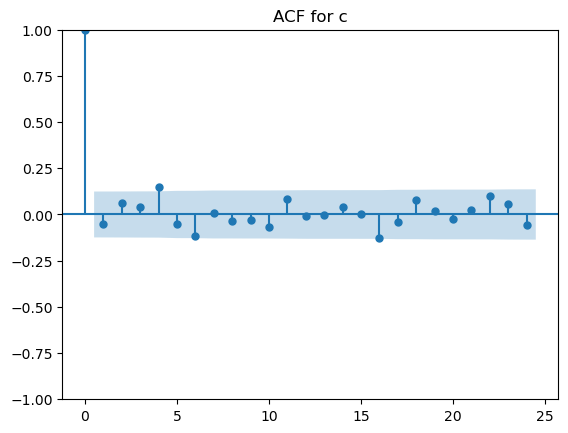

In [199]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.array(c))

plt.title("ACF for c")

plt.show()

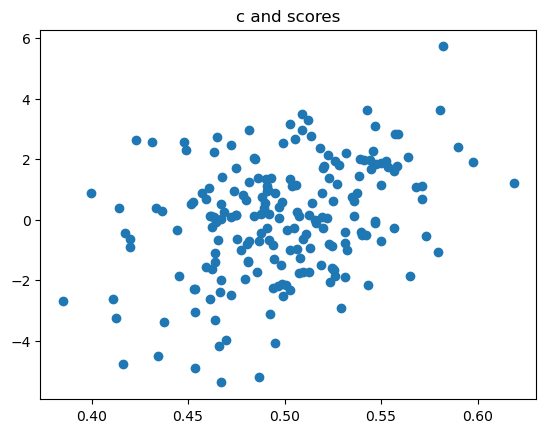

In [185]:
plt.figure()

plt.scatter(c[:train_index], k_scores[1,:])

plt.title("c and scores")

plt.show()

In [88]:
def select_order_ic(
        data: pd.DataFrame, 
        maxlags: int = 10
        ) -> Dict[str, int]:
    """
    Select lag order using AIC and BIC from statsmodels VAR.select_order.
    Returns dict with keys 'aic', 'bic', 'hqic' (if available).
    """
    model = VAR(data)
    sel = model.select_order(maxlags)
    # statsmodels returns object with attributes aic, bic, hqic that are integers (lags)
    return {'aic': int(sel.aic), 'bic': int(sel.bic), 'hqic': int(sel.hqic)}

def fit_var(data: pd.DataFrame, nlags: int) -> VAR:
    """
    Fit a VAR model and return the fitted results object.
    """
    model = VAR(data)
    res = model.fit(nlags)
    return res

In [85]:
def forecast_var(res, steps: int = 1) -> np.ndarray:
    """
    Forecast using a fitted statsmodels VARResults object.
    Returns a numpy array (steps x k).
    """
    return res.forecast(res.endog[-res.k_ar:], steps=steps)

In [186]:
selected_orders = select_order_ic(w_scores.T)
chosen_lag = selected_orders['bic']
var_res = fit_var(w_scores.T, nlags=chosen_lag)
print(var_res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Dec, 2025
Time:                     22:48:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    9.57397
Nobs:                     198.000    HQIC:                   9.51466
Log likelihood:          -1493.86    FPE:                    13021.2
AIC:                      9.47433    Det(Omega_mle):         12635.4
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.058570         0.918884            0.064           0.949
L1.y1         0.455406         0.064922            7.015           0.000
L1.y2         0.065774         0.106409            0.618           0.536

Results for equation 

c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\statsmodels\iolib\table.py:729: ComplexWarning: Casting complex values to real discards the imaginary part
  content = data_fmt % (data,)


In [187]:
h = 10
w_fc = var_res.forecast(var_res.endog[-var_res.k_ar:], steps=h).T

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

In [189]:
selected_orders = select_order_ic(k_scores.T)
chosen_lag = selected_orders['bic']
var_res = fit_var(k_scores.T, nlags=chosen_lag)
print(var_res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Dec, 2025
Time:                     22:48:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.52869
Nobs:                     198.000    HQIC:                   3.46938
Log likelihood:          -895.375    FPE:                    30.8474
AIC:                      3.42905    Det(Omega_mle):         29.9334
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.013177         0.204299           -0.064           0.949
L1.y1         0.459376         0.064979            7.070           0.000
L1.y2         0.080081         0.108117            0.741           0.459

Results for equation 

In [190]:
k_fc = var_res.forecast(var_res.endog[-var_res.k_ar:], steps=h).T

In [191]:
k_curve_forecast = KdFPC_model.predict(k_fc)
w_curve_forecast = WdFPC_model.predict(w_fc)
w_curve_forecast.shape

(3000, 10)

[]

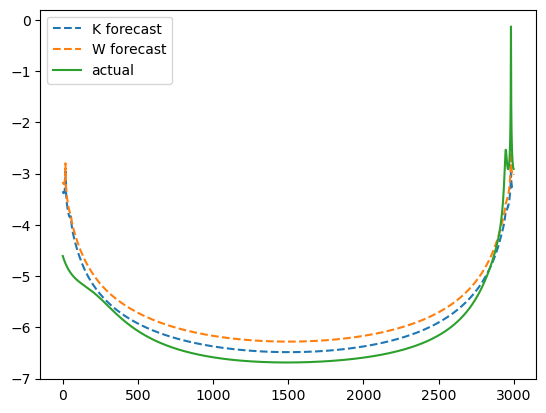

In [193]:
t=0
k_t_fc = k_curve_forecast[:,t]
w_t_fc = w_curve_forecast[:,t]

plt.figure()

plt.plot(k_t_fc, label="K forecast", linestyle="--")
plt.plot(w_t_fc, label="W forecast", linestyle="--")
plt.plot(test.values[:,t], label="actual")

plt.legend()

plt.plot()

In [194]:
df_k_fitted = pd.DataFrame(k_curve_forecast, columns=test.columns[:h])
df_w_fitted = pd.DataFrame(w_curve_forecast, columns=test.columns[:h])

df_w_fitted.tail()

,2025-09-19,2025-09-22,2025-09-23,2025-09-24,2025-09-25,2025-09-26,2025-09-29,2025-09-30,2025-10-01,2025-10-02
2995,-3.037305,-3.072248,-3.079772,-3.090670,-3.095567,-3.099857,-3.102460,-3.104354,-3.105603,-3.106472
2996,-3.034068,-3.068805,-3.076282,-3.087117,-3.091989,-3.096255,-3.098844,-3.100728,-3.101970,-3.102834
2997,-3.028556,-3.063122,-3.070560,-3.081343,-3.086195,-3.090441,-3.093019,-3.094894,-3.096131,-3.096991
2998,-3.020753,-3.055181,-3.062586,-3.073327,-3.078163,-3.082393,-3.084962,-3.086830,-3.088062,-3.088919
2999,-3.010614,-3.044931,-3.052312,-3.063018,-3.067842,-3.072060,-3.074621,-3.076484,-3.077712,-3.078567


In [195]:
model = pm.auto_arima(
    c,                         # univariate series
    seasonal=False,            # True if SARIMA
    trace=True,                # show the tried models
    error_action='ignore',     # ignore non-invertible models
    suppress_warnings=True,
     information_criterion='bic'
)

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0]             : BIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=367.467, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=84.322, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=-858.764, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : BIC=-865.195, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : BIC=inf, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : BIC=-845.835, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=-865.114, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : BIC=inf, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : BIC=inf, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=-872.128, Time=0.43 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=-876.274, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=-881.887, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=-886.783, Time=0.04

In [138]:
wvlt_bkw_supports, wvlt_bkw_densities = obtain_densities_from_lqd(
                                                            df_w_fitted,
                                                            lqdSup,
                                                            c
)

In [142]:
kle_bkw_supports, kle_bkw_densities = obtain_densities_from_lqd(
                                                            df_k_fitted,
                                                            lqdSup,
                                                            c
)

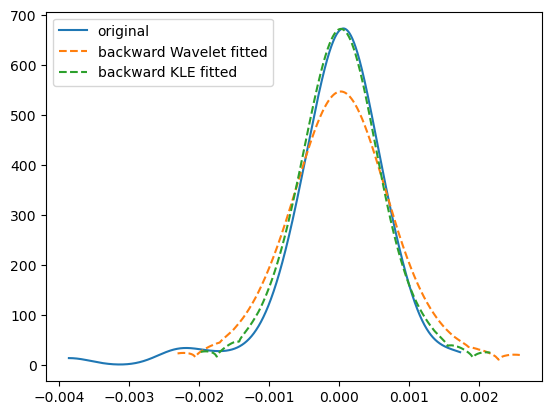

In [200]:
# Reconstrói curva a partir de estimação

t=1

plt.figure()

plt.plot(df_densities_supports.iloc[:,train.shape[1]+t], df_densities.iloc[:,train.shape[1]+t], label="original")

plt.plot(wvlt_bkw_supports.iloc[:,t], wvlt_bkw_densities.iloc[:,t], label="backward Wavelet fitted", linestyle="--")
plt.plot(kle_bkw_supports.iloc[:,t], kle_bkw_densities.iloc[:,t], label="backward KLE fitted", linestyle="--")

plt.legend()
# plt.title(f"Actual vs. Fitted (t={t})")

plt.show()